# Part1

In [ ]:
#load package and library
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
#laod data, if not already on disk and load it as numpy
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) #sample, data, class

In [ ]:
#introspect the images arrays to find the shapes for plotting
n_samples, h, w = lfw_people.images.shape #samples, height, width

#feature
X = lfw_people.data #X: samples, features,   lfw:Loaded Face in the Wild
n_features = X.shape[1]

#label
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print('Total data set size:')
print('n_samples: %d' % n_samples)
print('n_features: %d' % n_features)
print('n_classes: %d' % n_classes)

Total data set size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
#split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42)

In [ ]:
#compute PCA on the face dataset
n_components = 150

#centered data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

In [ ]:
#eigen decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))

#predict into PCA subspace
X_transformed = np.dot(X_train, components.T) #z = X·vT
print(X_transformed.shape)

X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

(966, 150)
(322, 150)


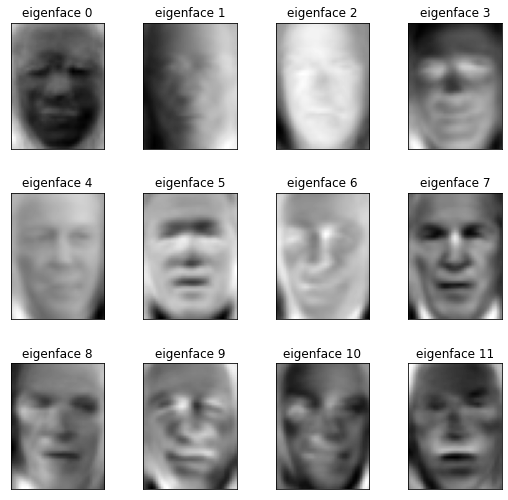

In [ ]:
import matplotlib.pyplot as plt

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  plt.figure(figsize=(1.8*n_col, 2.4*n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) #adjust layout parameters
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col,  i+1)
    plt.imshow(images[i].reshape((h,w)), cmap = plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

eigenface_titles = ['eigenface %d' % i  for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

(966,)


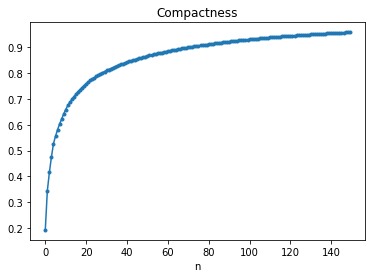

In [ ]:
explained_variance = (S**2) / (n_samples -1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)

plt.plot(eigenvalueCount, ratio_cumsum[:n_components], marker='.')
plt.xlabel('n')
plt.title('Compactness')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

estimator = RandomForestClassifier(n_estimators = 150, max_depth = 15, max_features=150)
estimator.fit(X_transformed, y_train)
predictions = estimator.predict(X_test_transformed)
correct = predictions == y_test
total_test = len(X_test_transformed)

print('Total Testing', total_test)
print('Predictions', predictions)
print('Which Correct: ', correct)
print('Total Correct: ', np.sum(correct))
print('Accuracy: ', np.sum(correct)/total_test)

Total Testing 322
Predictions [3 3 1 3 3 3 3 1 3 3 3 6 3 3 3 3 3 3 3 4 1 1 3 3 1 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 3 3 3 3 3 3 1 2 1 3 4 3 1 1 3 6 3 5 1 4 1 2 4 6 3 3
 3 2 3 6 3 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 2 3 3 3 3 3 3 3 3 3 3 1 3
 1 1 3 3 3 1 4 1 3 1 3 3 1 3 4 4 3 1 3 6 6 6 3 3 4 3 3 1 6 1 3 3 1 3 5 1 3
 6 1 1 1 3 3 3 3 6 3 3 3 6 5 5 1 3 5 5 1 3 3 1 3 3 1 6 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 2 4 3 2 3 6 3 3 3 3 6 3 3 3 2 3 3 4 2 4 2 1 5 3 3 3 5 3 0 3 3 3 3
 3 1 1 3 3 3 3 3 3 3 3 3 3 1 3 6 3 3 3 4 3 3 3 3 3 3 1 4 4 3 3 4 3 4 1 1 3
 3 3 3 3 1 3 5 1 1 3 6 1 3 3 3 6 3 3 3 3 3 1 1 3 3 3 3 3 3 3 4 3 3 5 3 3 3
 3 3 3 3 3 6 3 3 1 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3]
Which Correct:  [ True  True False  True  True  True False  True  True  True  True False
  True False  True  True  True  True  True  True  True False  True False
 False False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False  

In [ ]:
print(classification_report(y_test, predictions, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.08      0.14        13
     Colin Powell       0.70      0.62      0.65        60
  Donald Rumsfeld       0.60      0.22      0.32        27
    George W Bush       0.64      0.92      0.75       146
Gerhard Schroeder       0.56      0.40      0.47        25
      Hugo Chavez       0.80      0.53      0.64        15
       Tony Blair       0.74      0.39      0.51        36

         accuracy                           0.65       322
        macro avg       0.72      0.45      0.50       322
     weighted avg       0.67      0.65      0.62       322



Implement PCA algorithm for Eigenface problem with Tensorflow

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp

n_samples, h, w = lfw_people.images.shape #samples, height, width

#feature
X = lfw_people.data #X: samples, features,   lfw:Loaded Face in the Wild

#label
y = lfw_people.target

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42)
X_train, X_test = tf.constant(X_train), tf.constant(X_test)
y_train, y_test = tf.constant(y_train), tf.constant(y_test)


#scaled
mean_tr = tf.math.reduce_mean(X_train, axis=0)
mean_ts = tf.math.reduce_mean(X_train, axis=0)

X_train -= mean_tr
X_test -= mean_ts

#eigen decomposition
s, u, v = tf.linalg.svd(X_train, full_matrices=True, compute_uv=True) #stretching matrix, left singular vector, right singular vector

#eigenfaces
n_components = 150
components = tf.transpose(v)[:n_components] #r: components, c: feature
eigenfaces = tf.reshape(components, [n_components, h, w])

#squeeze into subspace
X_transformed = tf.linalg.matmul(X_train, components, transpose_b=True) 
X_test_transformed = tf.linalg.matmul(X_test, components, transpose_b=True) 

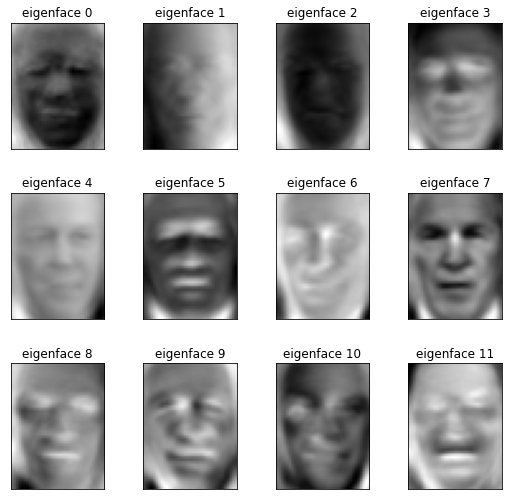

In [ ]:
import matplotlib.pyplot as plt

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  plt.figure(figsize=(1.8*n_col,  2.4*n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) #adjust layout parameters
  
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col,  i+1)
    plt.imshow(tf.reshape(eigenfaces[i], [h,w]).numpy(), cmap = plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

eigenface_titles = ['eigenface %d' % i  for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

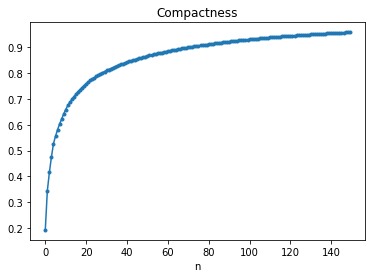

In [ ]:
#PCA evaluation
explained_variance = (s**2) / (n_samples -1)
total_var = tf.reduce_sum(explained_variance)
explained_variance_ratio = explained_variance / total_var
ratio_cumsum =  tf.math.cumsum(explained_variance_ratio, axis=0)
eigenvalueCount = tf.range(n_components)

plt.plot(eigenvalueCount, ratio_cumsum[:n_components], marker='.')
plt.xlabel('n')
plt.title('Compactness')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

estimator = RandomForestClassifier(n_estimators = 150, max_depth = 15, max_features=150)
estimator.fit(X_transformed, y_train)
predictions = estimator.predict(X_test_transformed.numpy())
correct = predictions == y_test
total_test = len(X_test_transformed)

print('Total Testing', total_test)
print('Predictions', predictions)
print('Which Correct: ', correct)
print('Total Correct: ', np.sum(correct))
print('Accuracy: ', np.sum(correct)/total_test)

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 6 3 3 3 3 4 3 3 4 1 1 3 3 0 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 3 3 3 3 3 3 3 2 1 3 4 3 1 1 3 6 3 4 1 4 3 3 4 6 3 3
 3 2 3 1 1 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 0 1 3 3 3 3 3 3 3 3 3 3 3 1 3
 3 6 3 3 3 1 4 1 3 1 3 3 1 3 4 4 3 1 3 6 6 6 3 3 4 3 3 1 3 1 3 3 1 3 3 1 3
 6 1 1 3 1 3 3 3 6 3 3 3 6 5 5 3 3 3 5 1 3 3 1 3 3 1 4 3 3 3 2 3 3 3 3 3 3
 3 3 3 3 2 4 3 2 3 6 3 3 3 3 3 3 3 3 4 3 2 6 2 3 2 4 5 3 3 3 6 3 2 3 3 3 3
 3 1 1 3 3 3 1 3 3 3 3 3 3 1 3 6 3 3 3 4 3 3 3 3 3 3 3 4 4 4 3 4 3 4 1 1 3
 3 3 3 3 1 3 4 1 1 3 1 1 3 3 3 6 3 3 3 3 3 1 1 3 3 3 3 3 3 3 4 3 3 5 3 3 3
 3 4 3 3 3 6 3 2 1 3 3 3 1 3 3 3 1 3 3 3 4 1 3 3 1 3]
Which Correct:  tf.Tensor(
[ True  True  True  True  True  True False  True  True  True  True False
  True False  True  True False  True  True  True  True False  True False
  True False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  Tr

In [ ]:
print(classification_report(y_test, predictions, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.08      0.13        13
     Colin Powell       0.71      0.58      0.64        60
  Donald Rumsfeld       0.60      0.22      0.32        27
    George W Bush       0.62      0.91      0.74       146
Gerhard Schroeder       0.44      0.44      0.44        25
      Hugo Chavez       1.00      0.33      0.50        15
       Tony Blair       0.67      0.33      0.44        36

         accuracy                           0.63       322
        macro avg       0.65      0.41      0.46       322
     weighted avg       0.64      0.63      0.60       322



#Part2

Try CNN with the dataset of part1


*   use TF/Keras
*  implement CNN
*   use Adam optimiser
*   use cross entropy loss






In [ ]:
#load package and library
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Input,Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

#laod data, if not already on disk and load it as numpy
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) #sample, data, class

#introspect the images arrays to find the shapes for plotting
n_samples, h, w = lfw_people.images.shape #samples, height, width

#feature
X = lfw_people.data #X: samples, features,   lfw:Loaded Face in the Wild
n_features = X.shape[1]

#label
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print('Total data set size:')
print('n_samples: %d' % n_samples)
print('n_features: %d' % n_features)
print('n_classes: %d' % n_classes)

Total data set size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
#split dataset
r = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=r, random_state=42)

#normalise
X_train, X_test  = X_train/255, X_test/255

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

1. Try with only dense layers for classification

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
depth = 100
length = h*w
batch_size = 50

inputs = Input(shape=(length,))

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(depth*4, input_dim=length, activation='relu'))
model.add(Dense(depth*2, activation='relu'))
model.add(Dense(depth, activation='relu'))
model.add(Dense(depth*2, activation='relu'))
model.add(Dense(depth*4, activation='relu'))
model.add(Dense(7, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, shuffle=True, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 3s 18ms/step - loss: 0.4133 - accuracy: 0.3416 - val_loss: 0.3573 - val_accuracy: 0.4534
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3787 - accuracy: 0.3975 - val_loss: 0.3504 - val_accuracy: 0.4534
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3696 - accuracy: 0.3986 - val_loss: 0.3448 - val_accuracy: 0.4534
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3615 - accuracy: 0.4161 - val_loss: 0.3315 - val_accuracy: 0.4814
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3560 - accuracy: 0.4389 - val_loss: 0.3623 - val_accuracy: 0.4534
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3580 - accuracy: 0.4379 - val_loss: 0.3123 - val_accuracy: 0.5311
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3291 - accuracy: 0.4679 - val_loss: 0.3061 - val_accuracy: 0.5248
Epoch 8/100


11/11 - 0s - loss: 0.1672 - accuracy: 0.8106


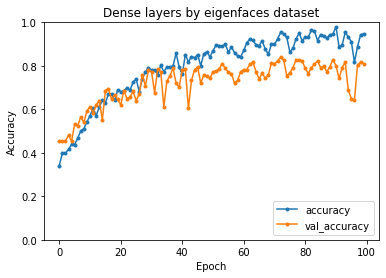

In [ ]:
#visualise the performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy', marker='.')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', marker='.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Dense layers by eigenfaces dataset')
plt.ylim(0, 1)
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

2. Two convolution layers of 3x3 with 32 filters each and dense layers for classification

In [ ]:
#split dataset
r = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=r, random_state=42)

#normalise
X_train, X_test  = X_train/255, X_test/255

#reshape
X_train = X_train.reshape((966, 50, 37,1))
X_test = X_test.reshape((322, 50, 37,1))

In [ ]:
#build model
model = models.Sequential()

#layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 37, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))

#dense layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

#optimiser and loss
opt = 'Adam'
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=opt,
              loss=loss,
              metrics=['accuracy'])

#train
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
31/31 [==============================] - 15s 24ms/step - loss: 1.7548 - accuracy: 0.3923 - val_loss: 1.6295 - val_accuracy: 0.4534
Epoch 2/25
31/31 [==============================] - 0s 11ms/step - loss: 1.6961 - accuracy: 0.3975 - val_loss: 1.6049 - val_accuracy: 0.4596
Epoch 3/25
31/31 [==============================] - 0s 11ms/step - loss: 1.6185 - accuracy: 0.4079 - val_loss: 1.4156 - val_accuracy: 0.4752
Epoch 4/25
31/31 [==============================] - 0s 11ms/step - loss: 1.3909 - accuracy: 0.4979 - val_loss: 1.1834 - val_accuracy: 0.5963
Epoch 5/25
31/31 [==============================] - 0s 11ms/step - loss: 1.0499 - accuracy: 0.6263 - val_loss: 0.9264 - val_accuracy: 0.6988
Epoch 6/25
31/31 [==============================] - 0s 10ms/step - loss: 0.7777 - accuracy: 0.7433 - val_loss: 0.8293 - val_accuracy: 0.7516
Epoch 7/25
31/31 [==============================] - 0s 10ms/step - loss: 0.6175 - accuracy: 0.7899 - val_loss: 0.7422 - val_accuracy: 0.7547
Epoch 8/25
3

11/11 - 0s - loss: 0.7148 - accuracy: 0.8727


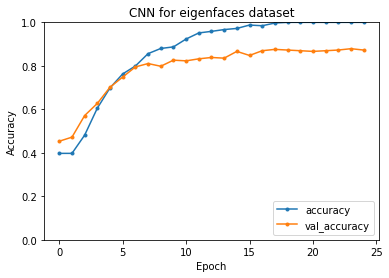

In [ ]:
#visualise the performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy', marker='.')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', marker='.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN for eigenfaces dataset')
plt.ylim(0, 1)
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

3. Classification with CIFAR10 dataset
*   show loss and accuracy curves of the training
*   should use at least three layers
*   accuracy should be over 0.8






In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

#load cifar10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
# one hot encode target values
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )

In [ ]:
#normalize
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_val = x_train[:10000]
y_val = y_train[:10000]

x_train = x_train[10000:]
y_train = y_train[10000:]

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X, y, idx):
  plt.figure(figsize =(15,2))
  plt.imshow(X[idx])
  plt.xlabel(classes[y[idx]])

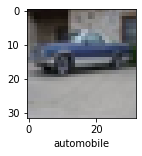

In [ ]:
import matplotlib.pyplot as plt
plot_sample(x_train, y_train, 0)

In [ ]:
model = models.Sequential([
                           #cnn
                           layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)),
                           layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                           layers.MaxPooling2D(2,2),
                           layers.Dropout(0.2),

                           layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                           layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                           layers.MaxPooling2D(2,2),
                           layers.Dropout(0.3),

                           layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
                           layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
                           layers.MaxPooling2D(2,2),
                           layers.Dropout(0.4),

                           layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
                           layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
                           layers.MaxPooling2D(2,2),
                           layers.Dropout(0.2),

                           layers.Flatten(),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(10, activation='softmax')
                           ])

opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train
history = model.fit(x_train, y_train, epochs=30,  batch_size=64, shuffle=True, validation_data=(x_val, y_val))

Epoch 1/30
625/625 [==============================] - 7s 10ms/step - loss: 2.1074 - accuracy: 0.2055 - val_loss: 1.9432 - val_accuracy: 0.2679
Epoch 2/30
625/625 [==============================] - 6s 10ms/step - loss: 1.7003 - accuracy: 0.3643 - val_loss: 1.5233 - val_accuracy: 0.4262
Epoch 3/30
625/625 [==============================] - 6s 10ms/step - loss: 1.4959 - accuracy: 0.4452 - val_loss: 1.3437 - val_accuracy: 0.5108
Epoch 4/30
625/625 [==============================] - 6s 10ms/step - loss: 1.3325 - accuracy: 0.5148 - val_loss: 1.2064 - val_accuracy: 0.5619
Epoch 5/30
625/625 [==============================] - 6s 10ms/step - loss: 1.2096 - accuracy: 0.5633 - val_loss: 1.0443 - val_accuracy: 0.6243
Epoch 6/30
625/625 [==============================] - 6s 10ms/step - loss: 1.0834 - accuracy: 0.6119 - val_loss: 0.9756 - val_accuracy: 0.6470
Epoch 7/30
625/625 [==============================] - 6s 10ms/step - loss: 0.9916 - accuracy: 0.6485 - val_loss: 0.8766 - val_accuracy: 0.6878

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6079 - accuracy: 0.8101


[0.6078751683235168, 0.8101000189781189]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)         

313/313 - 1s - loss: 0.6079 - accuracy: 0.8101


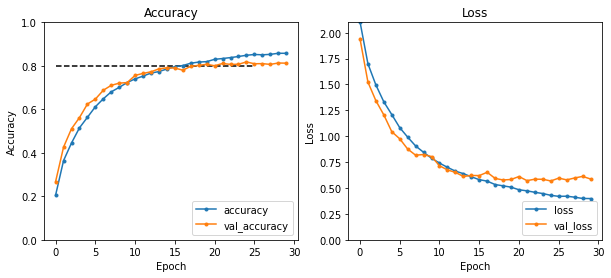

In [ ]:
#visualise the performance
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax1.plot(history.history['accuracy'], label='accuracy', marker='.')
ax1.plot(history.history['val_accuracy'], label = 'val_accuracy', marker='.')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.hlines(y=0.8, xmin=0, xmax=25, linestyles='--')
ax1.set_ylim(0, 1)
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='loss', marker='.')
ax2.plot(history.history['val_loss'], label = 'val_loss', marker='.')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Loss')
ax2.set_ylim(0, 2.1)
ax2.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(elem) for elem in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.93      0.89      0.91      1000
           2       0.72      0.75      0.74      1000
           3       0.74      0.57      0.64      1000
           4       0.74      0.84      0.79      1000
           5       0.74      0.72      0.73      1000
           6       0.74      0.92      0.82      1000
           7       0.89      0.80      0.84      1000
           8       0.87      0.91      0.89      1000
           9       0.89      0.89      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



# Part3

2. UNet

GAN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import LeakyReLU, Reshape
from keras.models import Sequential
import matplotlib.pylab as plt

In [ ]:
(X_tr, y_tr), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
length, h, w = X_tr.shape

#transformation to tensor
X_tr = X_tr.reshape((length, h, w, 1))

#normalization
X_tr = X_tr/ 255.0

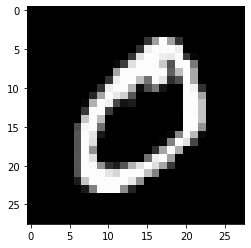

In [ ]:
plt.imshow(X_tr[1,: , :, 0], cmap='gray')

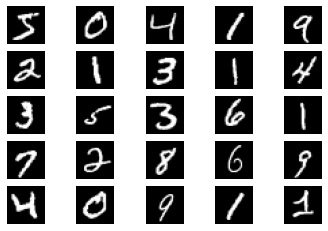

In [ ]:
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.axis('off')
  plt.imshow(X_tr[i,:,:,0], cmap='gray')

In [ ]:
#load data
def loaddata():
  (X_tr, y_tr), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
  length, h, w = X_tr.shape
  
  #transformation to tensor
  X_tr = X_tr.reshape((length, h, w, 1))

  #normalization
  X_tr = X_tr/ 255.0
  return X_train

In [ ]:
#discriminator
def discriminator(in_shape = (28,28,1)):
  #structure
  model = Sequential([
                     layers.Conv2D(filters= 64, kernel_size=(3,3), strides=(2,2), activation=LeakyReLU(alpha=0.2), padding = 'same', input_shape = in_shape),
                     layers.Dropout(0.4),
                     layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), activation=LeakyReLU(alpha=0.2), padding = 'same'),
                     layers.Dropout(0.4),
                     layers.Flatten(),
                     layers.Dense(1)
                     ])
  #optimizer
  model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model


#generator
def generator(latent_dim):
  n_nodes = 128 * 7 * 7
  model = Sequential([
                      layers.Dense(n_nodes,  activation=LeakyReLU(alpha=0.2), input_dim = latent_dim),
                      layers.Reshape((7,7,128)),
                      layers.Conv2DTranspose(filters=128, kernel_size= (4,4), strides=(2,2), activation=LeakyReLU(alpha=0.2), padding='same'),
                      layers.Conv2DTranspose(filters=128, kernel_size= (4,4), strides=(2,2), activation=LeakyReLU(alpha=0.2), padding='same'),
                      layers.Conv2D(filters = 1, kernel_size=(7,7), activation='sigmoid', padding='same')
                      ])
  return model


#gan
def gan(g_model, d_model):
	#set discriminator not trainable
	d_model.trainable = False
	#connect generator and descriminator models
	model = Sequential([
                     g_model,
                     d_model
                     ])
	#compile model
	opt = tf.keras.optimizers.Adam()
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model


#select real samples
def generate_real_samples(dataset, n_samples):
  #choose index randomly
  idx = np.random.randint(0, dataset.shape[0], n_samples)
  X = dataset[idx]
  #generate class of the real samples
  y = np.ones((n_samples, 1))
  return X, y


#generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  #generate points
  x_input = np.random.randn(latent_dim * n_samples)
  #reshape for a batch of inputs for the networks
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input


#generate fake n samples with class label
def generate_fake_samples(g_model, latent_dim, n_samples):
  #generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  #predict outputs
  X = g_model.predict(x_input)
  #create fake class label
  y = np.zeros((n_samples,1))
  return X, y


#save generated images with generator
def save_plot(examples, epoch, n=10):
  for i in range(n*n):
    #plot images
    plt.subplot(n, n, 1+i)
    plt.axis('off')
    plt.imshow(examples[i, :, :, 0], cmap='gray')
  
  #save plot to file
  filename = 'generator_plot_e{:03d}.png'.format(epoch+1)
  plt.savefig(filename)
  plt.close()


def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
  X_real, y_real = generate_real_samples(dataset, n_samples)
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)

  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)

  print('>Accuracu real: {:1f}%, fake: {:1f}%'.format(acc_real*100, acc_fake*100))
  #save plot
  save_plot(x_fake, epoch)
  filename =  'generator_model_{:03d}.h5'.format(epoch+1)
  g_model.save(filename)


#train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, epochs = 50, n_batchs = 256):
  batch_per_epoch = int(dataset.shape[0]/n_batchs)
  half_batch = int(n_batchs/2)

  for epoch in range(epochs):
    for batch in range(batch_per_epoch):
      #get real sample randomly
      X_real, y_real = generate_real_samples(dataset, half_batch)

      #genrate 'fake' examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)

      X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))

      d_loss, _ = d_model.train_on_batch(X, y)

      X_gan = generate_latent_points(latent_dim, n_batchs)
      y_gan = np.ones((n_batchs,1))

      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      #print('{}, {}/{}, d={:2f}, g={:2f}'.format(epoch+1, batch, batch_per_epoch, d_loss, g_loss[0]))

    if (epoch +1)%5 == 0:
      summarize_performance(epoch, g_model, d_model, dataset, latent_dim)

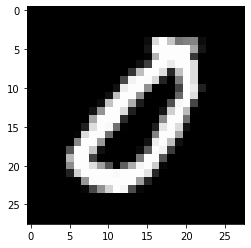

In [ ]:
plt.imshow(generate_real_samples(X_tr, 1)[0][0, :,  :, 0], cmap='gray')

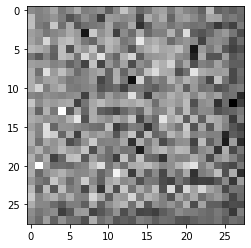

In [ ]:
plt.imshow(generate_fake_samples(generator(100), 100, 1)[0][0, :,  :, 0], cmap='gray')

In [ ]:
generate_latent_points(100, 3)[1]

array([-0.30297143,  0.27777041,  0.28753384, -0.86712083, -0.35365773,
        0.27997052,  0.28731698,  1.19607585,  0.4730136 ,  0.13308758,
       -0.16591882,  0.55736843, -0.12521289,  1.0167516 , -1.11482856,
        0.27046976, -1.79024057, -1.71217982, -1.97958534, -0.32764691,
        1.27789374,  0.1413503 ,  0.66940202, -1.3584245 , -0.64380344,
        0.25693028,  0.53418274,  0.02174562,  0.03160406, -1.38504298,
       -1.105089  , -0.58543633,  0.05392429, -0.46044379,  0.3949715 ,
        1.3761881 ,  1.28707801,  1.1600288 , -0.25793159,  1.17718767,
        0.58669184, -0.58561566, -1.09230836,  0.37735408, -0.41235325,
        0.3216369 ,  0.32719832, -0.94053607,  0.64153414,  0.87131675,
        0.71973337,  0.02953127,  0.17166448,  0.0161711 ,  1.19772831,
       -0.24091011,  2.34940974,  1.44653164,  1.24097784, -0.26767305,
        0.14835392, -0.35864701,  0.91476226, -1.22477957, -0.51266179,
       -0.75048112,  0.70757628,  1.44178302,  0.42199254,  2.46

In [ ]:
# size of the latent space
latent_dim = 100

# create the discriminator
d_model = discriminator()

# create the generator
g_model = generator(latent_dim)

# create the gan
gan_model = gan(g_model, d_model)

#train model
train(g_model, d_model, gan_model, X_tr, latent_dim)

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fb71ef88830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


KeyboardInterrupt: ignored

In [ ]:
from keras.models import load_model

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	plt.show()

# load model
model = load_model('generator_model_050.h5')
# generate images
latent_points = generate_latent_points(100, 30)
# generate images
X = model.predict(latent_points)
X[0, :, :, 0].shape

(28, 28)

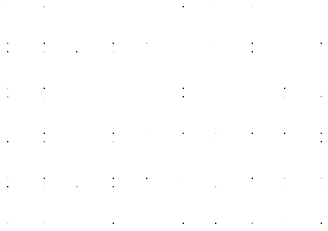

In [ ]:
# plot the result
save_plot(X, 5)

#Official GAN

In [ ]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-shy528y5
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-shy528y5
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0234a683cb5151df075215241f150f8302f29e575_-py3-none-any.whl size=157048 sha256=d93a4f22c0618e6bd3d1866d0f8839a47eb903a67176cafb311cd5d9ab6e9b04
  Stored in directory: /tmp/pip-ephem-wheel-cache-kmbdukhq/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Failed to build tensorflow-docs
    Running setup.py install for tensorflow-docs ... done
  DEPRECATION: tensorflow-docs was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
#load dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [ ]:
#set the running conditions
BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

tf.Tensor([[0.0032521]], shape=(1, 1), dtype=float32)


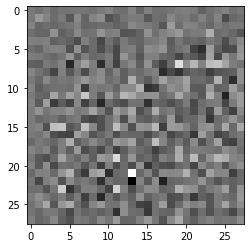

In [ ]:
generator = make_generator_model()
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[-0.00116688]], shape=(1, 1), dtype=float32)


In [ ]:
#optimiser
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

#discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

#generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

#optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
#Save check point
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
#set training condition
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

#input data for generator
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator, epoch + 1, seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, seed)

In [ ]:
#plot and save images
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

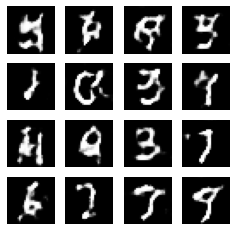

Time for epoch 12 is 26.592390537261963 sec


KeyboardInterrupt: ignored

In [ ]:
#train
train(train_dataset, EPOCHS)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

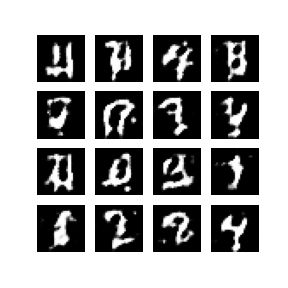

In [ ]:
display_image(4)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


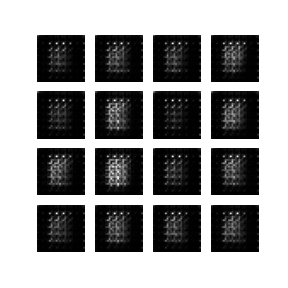

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)